In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integ
from scipy import interpolate as intp
import os
from multiprocessing import Pool
import pandas as pd
import csv
import time
from scipy.fft import fft, fftfreq

In [2]:
TT=100
gap=1
size=np.array(range(4,21,2))
T=np.linspace(1e-8,10,TT)[::gap]

In [3]:
def extract_data(lamb,R):
    f='size%s.csv'%str(R)
    data= pd.read_csv("data/lamb%s"%str(lamb)+f)
    m=np.array(data.Magnetization)
    e=np.array(data.Energy)
    c=np.array(data.SpecificHeat)
    x=np.array(data.Suceptibility)
    M=np.zeros(TT//gap)
    E=np.zeros(TT//gap)
    C=np.zeros(TT//gap)
    X=np.zeros(TT//gap)
    R_no=m.size//TT
    for i in range(R_no):
        M+=m[i*TT:(i+1)*TT][::gap]
        E+=e[i*TT:(i+1)*TT][::gap]
        C+=c[i*TT:(i+1)*TT][::gap]
        X+=x[i*TT:(i+1)*TT][::gap]
    M=M/R_no
    E=E/R_no
    C=C/R_no
    X=X/R_no

    return M, E, C, X

In [4]:
def find_Tc(_lamb,size):
    C=extract_data(_lamb,size)[2]
    ind_max=np.argmax(C)
    Tc=T[ind_max]
    #f=intp.interp1d(size,Tc,fill_value='extrapolate')
    #tc=f(1000)
    return Tc

In [5]:
def fit_Tc_lamb(lamb,a,b,c):
    return a+b*lamb**2

In [6]:
lamb=np.array(range(-10,11))/10
siz=8
Tc=np.array([find_Tc(i,siz) for i in lamb])

In [7]:
a,b,c=opt.curve_fit(fit_Tc_lamb,lamb,Tc)[0]

/home/tirthankar/miniconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, 'Critical Temperature vs $\\Delta$ for L=8x8')

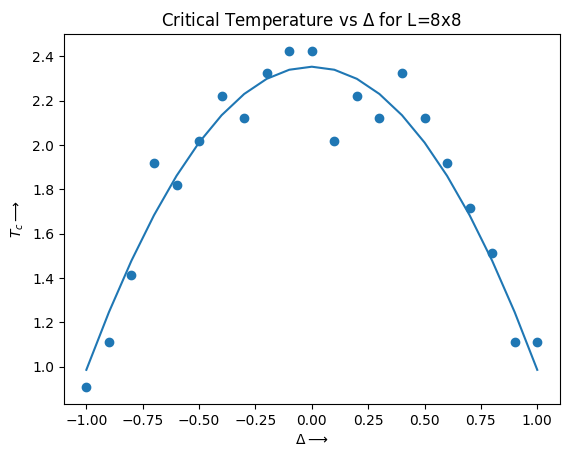

In [9]:
plt.scatter(lamb,Tc)
plt.plot(lamb,fit_Tc_lamb(lamb,a,b,c))
plt.xlabel(r"$\Delta\longrightarrow$")
plt.ylabel(r"$T_c\longrightarrow$")
plt.title(r"Critical Temperature vs $\Delta$ for L=8x8")

In [97]:
Tc0=fit_Tc_lamb(0,a,b,c)
print("Critical temperature at T=0K: "+str(Tc0))

Critical temperature at T=0K: 2.353049957467861


In [4]:
def extract_data2(lamb,R):
    f='size%s.csv'%str(R)
    data= pd.read_csv("diffSize/lamb%s"%str(lamb)+f)
    m=np.array(data.Magnetization)
    e=np.array(data.Energy)
    c=np.array(data.SpecificHeat)
    x=np.array(data.Suceptibility)
    M=np.zeros(TT//gap)
    E=np.zeros(TT//gap)
    C=np.zeros(TT//gap)
    X=np.zeros(TT//gap)
    R_no=m.size//TT
    for i in range(R_no):
        M+=m[i*TT:(i+1)*TT][::gap]
        E+=e[i*TT:(i+1)*TT][::gap]
        C+=c[i*TT:(i+1)*TT][::gap]
        X+=x[i*TT:(i+1)*TT][::gap]
    M=M/R_no
    E=E/R_no
    C=C/R_no
    X=X/R_no

    return M, E, C, X

In [99]:
def mag(T,tc,a,b,c):
    return b/(np.exp(a*(T-tc))+1)+c
    
def find_Tc2(_size):
    C=extract_data2(0.0,_size)[0]
    vmag=np.vectorize(mag)
    tc,a,b,c=opt.curve_fit(mag,T,C)[0]
    return tc

In [100]:
def fit_Tc_L(_size,a,b):
    return a+b/_size

In [101]:
lamb=0.0
Tc=np.array([find_Tc2(i) for i in size])

In [102]:
a,b=opt.curve_fit(fit_Tc_L,size,Tc)[0]

Text(0.5, 1.0, 'Finite Scaling')

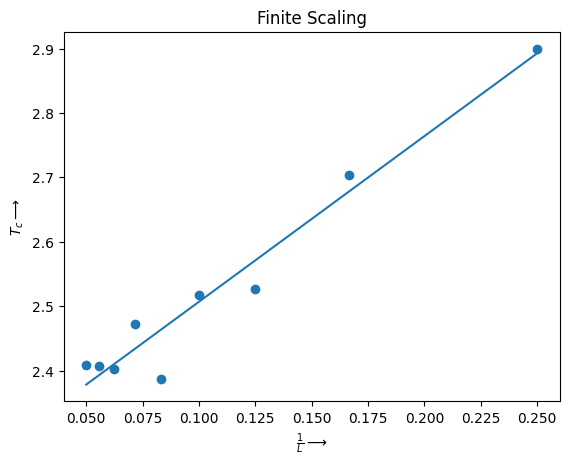

In [103]:
plt.scatter(1/size,Tc)
plt.plot(1/size,fit_Tc_L(size,a,b))
plt.xlabel(r"$\frac{1}{L}\longrightarrow$")
plt.ylabel(r"$T_c\longrightarrow$")
plt.title("Finite Scaling")

In [104]:
print('Critical Temperature: '+str(fit_Tc_L(1e7,a,b)))

Critical Temperature: 2.2498235846905263


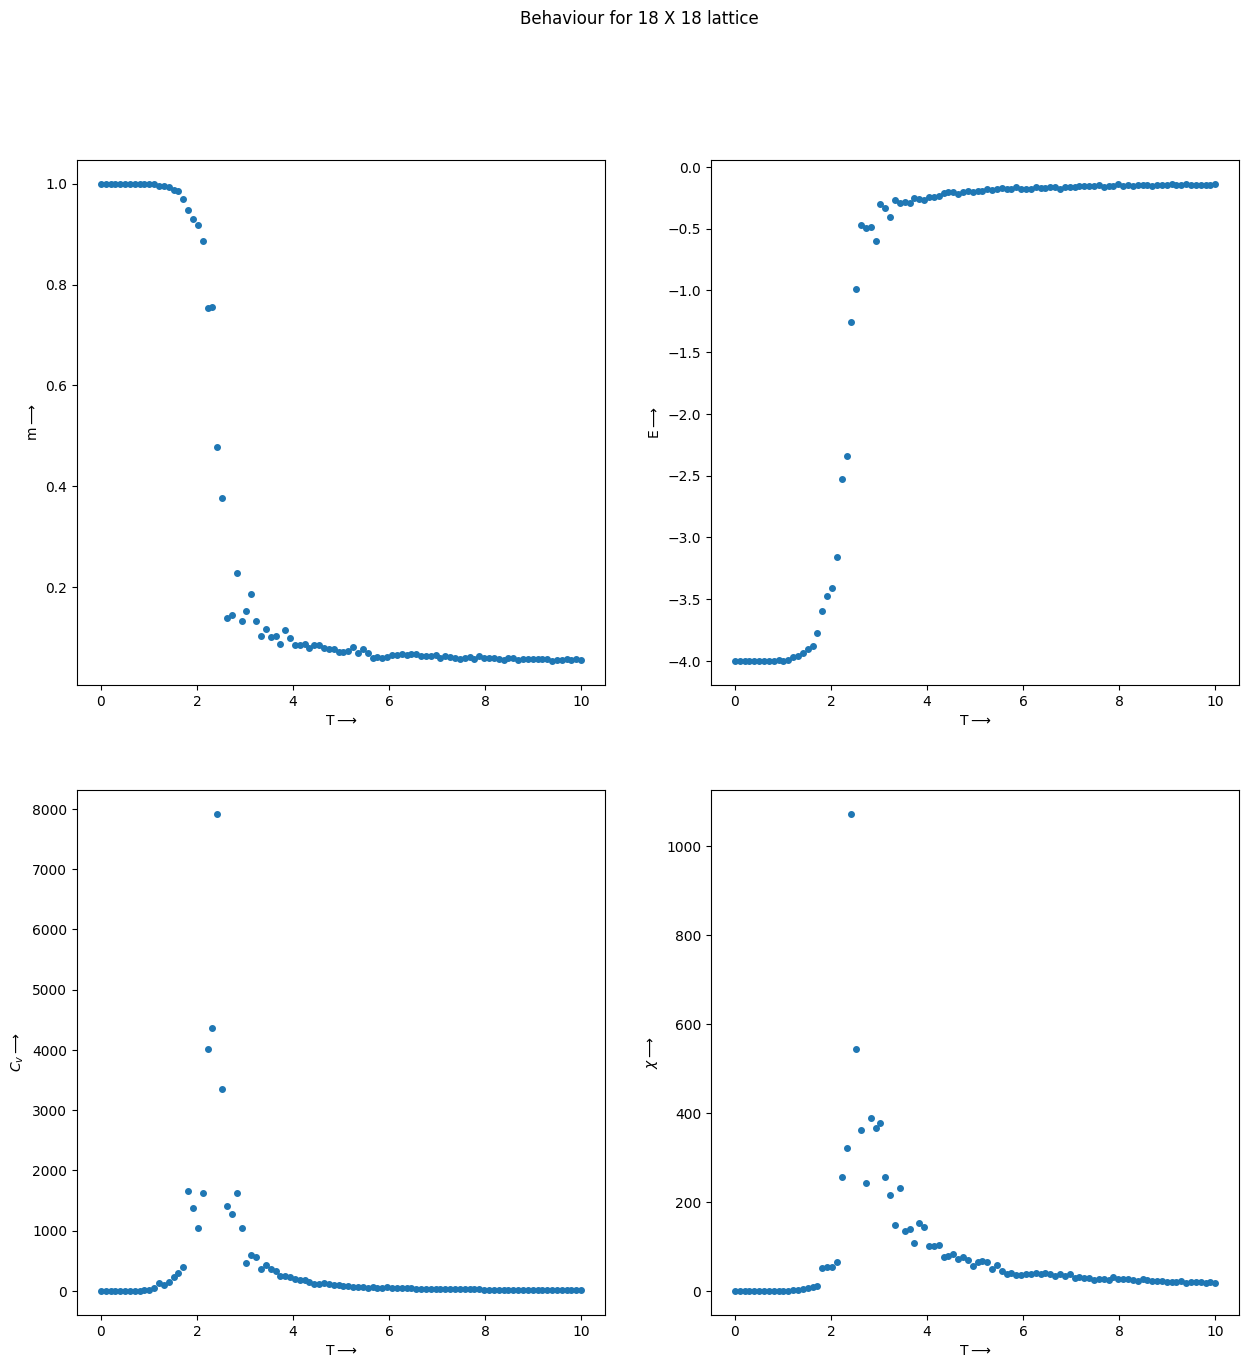

In [105]:
plt.figure(figsize=(15,15))
M,E,C,X=extract_data2(0.0,18)

plt.subplot(2, 2, 1)
plt.scatter(T,M,label=str(lamb),s=16)
# plt.plot(T,M,label=str(lamb))
# plt.xlim([0,5])
plt.xlabel(r"T$\longrightarrow$")
plt.ylabel(r"m$\longrightarrow$")

plt.subplot(2, 2, 2)
plt.scatter(T,-E,label=str(lamb),s=16)
# plt.plot(T,E,label=str(lamb))
plt.xlabel(r"T$\longrightarrow$")
plt.ylabel(r"E$\longrightarrow$")

plt.subplot(2, 2, 3)
plt.scatter(T,C,label=str(lamb),s=16)#,marker=".")
# plt.plot(T,C,label=str(lamb))
plt.xlabel(r"T$\longrightarrow$")
plt.ylabel(r"$C_v\longrightarrow$")

plt.subplot(2, 2, 4)
plt.scatter(T,X,label=str(lamb),s=16)#marker=".")
# plt.plot(T,X,label=str(lamb))
plt.xlabel(r"T$\longrightarrow$")
plt.ylabel(r"$\chi\longrightarrow$")
plt.suptitle("Behaviour for 18 X 18 lattice")
plt.savefig("image.jpg")
M,E,C,X=extract_data2(0.0,12)



Text(0.5, 1.0, 'm vs T for L=16X16')

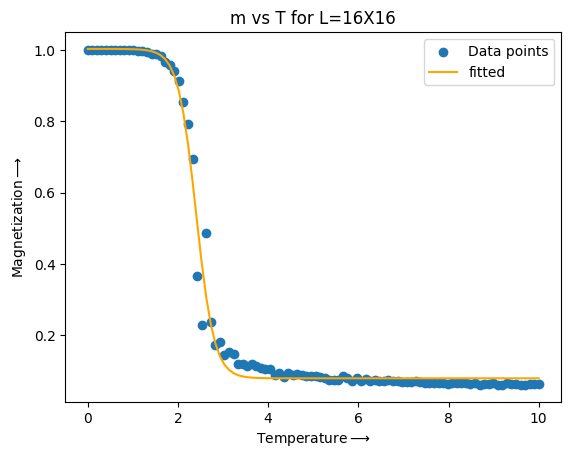

In [56]:
R=16
C=extract_data2(0.0,R)[0]
tc,a,b,c=opt.curve_fit(mag,T,C)[0]
plt.scatter(T,C,label="Data points")
plt.plot(T,mag(T,tc,a,b,c),c='orange',label="fitted")
plt.xlabel(r"Temperature$\longrightarrow$")
plt.ylabel("Magnetization$\longrightarrow$")
plt.legend()
plt.title("m vs T for L=%sX"%R+"%s"%R)

In [57]:
a

5.001582248486257

Text(0, 0.5, 'E$\\longrightarrow$')

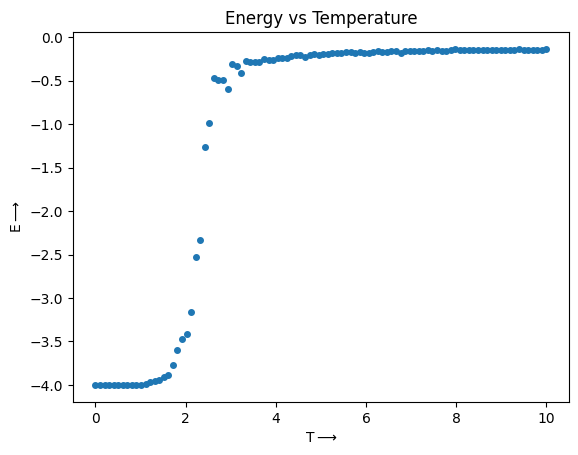

In [18]:
#plt.figure(figsize=(15,15))
M,E,C,X=extract_data2(0.0,18)

plt.scatter(T,-E,label=str(0.0),s=16)
# plt.plot(T,M,label=str(lamb))
# plt.xlim([0,5])
plt.title("Energy vs Temperature")
plt.xlabel(r"T$\longrightarrow$")
plt.ylabel(r"E$\longrightarrow$")